# **Airline Customer Satisfaction Capstone**

## Modeling

INFO HERE

## 1. Table of Contents

[1. Table of Contents](#1.-Table-of-Contents)

[2. Import Packages](#2.-Import-Packages)

[3. Load Data](#3.-Load-Data)

[4. Explore the Data](#4.-Explore-the-Data)

[5. Resampling Techniques](#5.-Resampling-Techniques)

[6. Logistic Regression](#6.-Logistic-Regression)

[7. Random Forest](#7.-Random-Forest)

[8. XGBoost](#8.-XGBoost)

## 2. Import Packages

In [81]:
import pandas as pd
import numpy as np
import os
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import __version__ as sklearn_version
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.dummy import DummyRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.feature_selection import SelectKBest, f_regression
import datetime
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, classification_report,confusion_matrix
from sklearn.metrics import accuracy_score ,confusion_matrix,classification_report,plot_confusion_matrix

## 3. Load Data

In [10]:
X_train = pd.read_csv('/Users/lauren/Desktop/X_train.csv', index_col=0)
X_test = pd.read_csv('/Users/lauren/Desktop/X_test.csv', index_col=0)
y_train = pd.read_csv('/Users/lauren/Desktop/y_train.csv', index_col=0)
y_test = pd.read_csv('/Users/lauren/Desktop/y_test.csv', index_col=0)

## 4. Explore the Data

In [11]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 107696 to 6923
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   90640 non-null  int64  
 1   Age                                     90640 non-null  int64  
 2   Flight Distance                         90640 non-null  int64  
 3   Departure Delay                         90640 non-null  int64  
 4   Arrival Delay                           90640 non-null  float64
 5   Departure and Arrival Time Convenience  90640 non-null  int64  
 6   Ease of Online Booking                  90640 non-null  int64  
 7   Check-in Service                        90640 non-null  int64  
 8   Online Boarding                         90640 non-null  int64  
 9   Gate Location                           90640 non-null  int64  
 10  On-board Service                        90640 non-null

In [12]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38847 entries, 18831 to 79733
Data columns (total 28 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   index                                   38847 non-null  int64  
 1   Age                                     38847 non-null  int64  
 2   Flight Distance                         38847 non-null  int64  
 3   Departure Delay                         38847 non-null  int64  
 4   Arrival Delay                           38847 non-null  float64
 5   Departure and Arrival Time Convenience  38847 non-null  int64  
 6   Ease of Online Booking                  38847 non-null  int64  
 7   Check-in Service                        38847 non-null  int64  
 8   Online Boarding                         38847 non-null  int64  
 9   Gate Location                           38847 non-null  int64  
 10  On-board Service                        38847 non-null

In [13]:
y_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 90640 entries, 107696 to 6923
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Satisfaction  90640 non-null  object
dtypes: object(1)
memory usage: 1.4+ MB


In [14]:
y_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38847 entries, 18831 to 79733
Data columns (total 1 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Satisfaction  38847 non-null  object
dtypes: object(1)
memory usage: 607.0+ KB


In [15]:
y_train.value_counts()

Satisfaction           
Neutral or Dissatisfied    51257
Satisfied                  39383
dtype: int64

In [16]:
y_test.value_counts()

Satisfaction           
Neutral or Dissatisfied    21968
Satisfied                  16879
dtype: int64

## 5. Resampling Techniques

There are two resampling techniquest that we will use: undersampling and oversampling.  First, we will look at undersampling:

### 5.1 Undersampling

In [63]:
counts_table = pd.DataFrame()

counts_table['technique'] = ['Original Data']
counts_table['X_train_shape'] = [X_train.shape[0]]
counts_table['y_train_shape'] = [y_train.shape[0]]
counts_table['Satisfied'] = [y_train.value_counts()[1]]
counts_table['Neutral or Dissatisfied'] = [y_train.value_counts()[0]]

counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257


In [64]:
from imblearn.under_sampling import RandomUnderSampler

rus = RandomUnderSampler(random_state=42, replacement=True)

X_train_rus, y_train_rus = rus.fit_sample(X_train, y_train)

In [65]:
new_row = {'technique':'Random Under Sampling', 
           'X_train_shape': X_train_rus.shape[0],
          'y_train_shape': y_train_rus.shape[0],
           'Satisfied': y_train_rus.value_counts()[1],
          'Neutral or Dissatisfied': y_train_rus.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257
1,Random Under Sampling,78766,78766,39383,39383


### 5.2 SMOTE

In [66]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, sampling_strategy = 'minority')

X_train_sm, y_train_sm = smote.fit_sample(X_train, y_train)

In [67]:
new_row = {'technique':'SMOTE - minority', 
           'X_train_shape': X_train_sm.shape[0],
          'y_train_shape': y_train_sm.shape[0],
           'Satisfied': y_train_sm.value_counts()[1],
          'Neutral or Dissatisfied': y_train_sm.value_counts()[0]}

counts_table = counts_table.append(new_row, ignore_index=True)
counts_table

,technique,X_train_shape,y_train_shape,Satisfied,Neutral or Dissatisfied
0,Original Data,90640,90640,39383,51257
1,Random Under Sampling,78766,78766,39383,39383
2,SMOTE - minority,102514,102514,51257,51257


In [68]:
X_train_np = X_train.to_numpy()
y_train_np = y_train.to_numpy().ravel()
X_train_rus_np = X_train_rus.to_numpy()
y_train_rus_np = y_train_rus.to_numpy().ravel()
X_train_ros_np = X_train_ros.to_numpy()
y_train_ros_np = y_train_ros.to_numpy().ravel()
X_train_sm_np = X_train_sm.to_numpy()
y_train_sm_np = y_train_sm.to_numpy().ravel()

X_test_np = X_test.to_numpy()
y_test_np = y_test.to_numpy().ravel()

In [69]:
print(X_train_np.shape, y_train_np.shape)
print(X_train_rus_np.shape, y_train_rus_np.shape)
print(X_train_ros_np.shape, y_train_ros_np.shape)
print(X_train_sm_np.shape, y_train_sm_np.shape)

(90640, 28) (90640,)
(78766, 28) (78766,)
(102514, 28) (102514,)
(102514, 28) (102514,)


## 6. Logistic Regression

### 6.1 Random Under Sampling

In [31]:
from sklearn.linear_model import LogisticRegression

lr_rus = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the trainng data.
lr_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_1a = lr_rus.predict(X_train_rus_np)
y_pred_test_1a = lr_rus.predict(X_test_np)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [32]:
cm_1a_train = confusion_matrix(y_train_rus_np, y_pred_train_1a)
cm_1a_test = confusion_matrix(y_test_np, y_pred_test_1a)

Text(0.5, 1.0, 'LogisticRegression RUS - Testing confusion matrix')

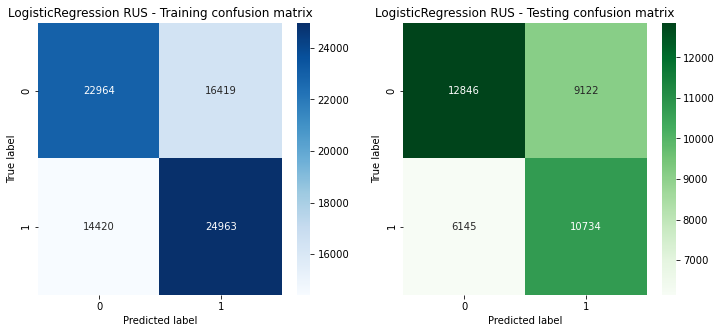

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression RUS - Training confusion matrix')

sns.heatmap(cm_1a_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression RUS - Testing confusion matrix')

In [34]:
from sklearn.metrics import classification_report

target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
print(classification_report(y_train_rus_np, y_pred_train_1a, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_1a, target_names=target_names))

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.61      0.58      0.60     39383
Neutral or Dissatisfied       0.60      0.63      0.62     39383

               accuracy                           0.61     78766
              macro avg       0.61      0.61      0.61     78766
           weighted avg       0.61      0.61      0.61     78766

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.68      0.58      0.63     21968
Neutral or Dissatisfied       0.54      0.64      0.58     16879

               accuracy                           0.61     38847
              macro avg       0.61      0.61      0.61     38847
           weighted avg       0.62      0.61      0.61     38847



### 6.2 SMOTE

In [47]:
lr_sm = LogisticRegression(solver = 'saga', random_state=42, max_iter = 2000)
# Fit the model on the trainng data.
lr_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_1c = lr_sm.predict(X_train_sm_np)
y_pred_test_1c = lr_sm.predict(X_test_np)

/Users/lauren/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_sag.py:329: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn("The max_iter was reached which means "


In [48]:
cm_1c_train = confusion_matrix(y_train_sm_np,y_pred_train_1c)
cm_1c_test = confusion_matrix(y_test_np,y_pred_test_1c)

Text(0.5, 1.0, 'LogisticRegression SMOTE - Testing confusion matrix')

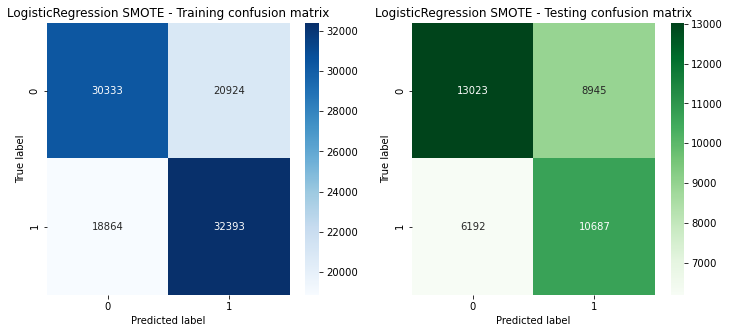

In [49]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_1c_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('LogisticRegression SMOTE - Training confusion matrix')

sns.heatmap(cm_1c_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('LogisticRegression SMOTE - Testing confusion matrix')

In [50]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
print(classification_report(y_train_sm_np, y_pred_train_1c, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_1c, target_names=target_names))

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.62      0.59      0.60     51257
Neutral or Dissatisfied       0.61      0.63      0.62     51257

               accuracy                           0.61    102514
              macro avg       0.61      0.61      0.61    102514
           weighted avg       0.61      0.61      0.61    102514

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.68      0.59      0.63     21968
Neutral or Dissatisfied       0.54      0.63      0.59     16879

               accuracy                           0.61     38847
              macro avg       0.61      0.61      0.61     38847
           weighted avg       0.62      0.61      0.61     38847



## 7. Random Forest

### 7.1 Random Under Sampling

In [57]:
from sklearn.ensemble import RandomForestClassifier

rf_rus = RandomForestClassifier(random_state=42)
rf_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_2a = rf_rus.predict(X_train_rus_np)
y_pred_test_2a = rf_rus.predict(X_test_np)

In [58]:
cm_2a_train = confusion_matrix(y_train_rus_np,y_pred_train_2a)
cm_2a_test = confusion_matrix(y_test_np,y_pred_test_2a)

Text(0.5, 1.0, 'RandomForest RUS - Testing confusion matrix')

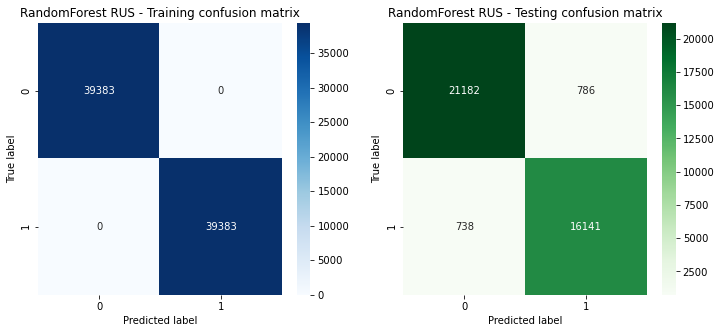

In [59]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2a_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest RUS - Training confusion matrix')

sns.heatmap(cm_2a_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest RUS - Testing confusion matrix')

In [60]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
print(classification_report(y_train_rus_np, y_pred_train_2a, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_2a, target_names=target_names))

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       1.00      1.00      1.00     39383
Neutral or Dissatisfied       1.00      1.00      1.00     39383

               accuracy                           1.00     78766
              macro avg       1.00      1.00      1.00     78766
           weighted avg       1.00      1.00      1.00     78766

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.97      0.96      0.97     21968
Neutral or Dissatisfied       0.95      0.96      0.95     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



### 7.2 SMOTE

In [73]:
rf_sm = RandomForestClassifier(random_state=42)
rf_sm.fit(X_train_sm_np, y_train_sm_np)

y_pred_train_2b = rf_sm.predict(X_train_sm_np)
y_pred_test_2b = rf_sm.predict(X_test_np)

In [74]:
cm_2b_train = confusion_matrix(y_train_sm_np,y_pred_train_2b)
cm_2b_test = confusion_matrix(y_test_np,y_pred_test_2b)

Text(0.5, 1.0, 'RandomForest SMOTE - Testing confusion matrix')

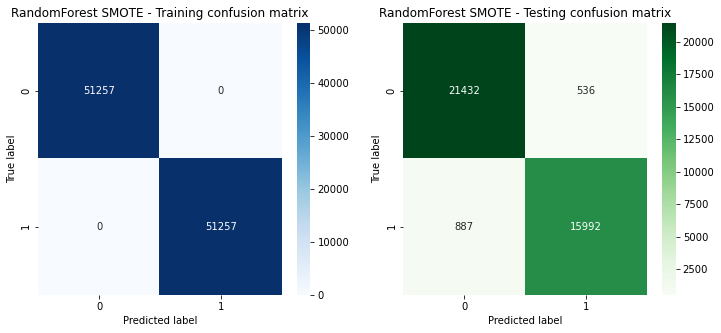

In [75]:
fig, ax = plt.subplots(1,2, figsize=(12,5))
sns.heatmap(cm_2b_train, annot=True, fmt = '', cmap = 'Blues',ax = ax[0])
ax[0].set_xlabel('Predicted label')
ax[0].set_ylabel('True label')
ax[0].set_title('RandomForest SMOTE - Training confusion matrix')

sns.heatmap(cm_2b_test, annot=True, fmt = '', cmap = 'Greens',ax = ax[1])
ax[1].set_xlabel('Predicted label')
ax[1].set_ylabel('True label')
ax[1].set_title('RandomForest SMOTE - Testing confusion matrix')

In [76]:
target_names = ['Satisfied', 'Neutral or Dissatisfied']

print("[Training Classification Report]")
print(classification_report(y_train_sm_np, y_pred_train_2b, target_names=target_names))

print("[Test Classification Report]")
print(classification_report(y_test_np, y_pred_test_2b, target_names=target_names))

[Training Classification Report]
                         precision    recall  f1-score   support

              Satisfied       1.00      1.00      1.00     51257
Neutral or Dissatisfied       1.00      1.00      1.00     51257

               accuracy                           1.00    102514
              macro avg       1.00      1.00      1.00    102514
           weighted avg       1.00      1.00      1.00    102514

[Test Classification Report]
                         precision    recall  f1-score   support

              Satisfied       0.96      0.98      0.97     21968
Neutral or Dissatisfied       0.97      0.95      0.96     16879

               accuracy                           0.96     38847
              macro avg       0.96      0.96      0.96     38847
           weighted avg       0.96      0.96      0.96     38847



## 8. XGBoost

### 8.1 Random Under Sampling

In [85]:
import xgboost as xgb

y_train['Satisfaction'] = y_train['Satisfaction'].apply(lambda x: 1 if (x == 'Satisfied') else 0)
y_test['Satisfaction'] = y_test['Satisfaction'].apply(lambda x: 1 if (x == 'Satisfied') else 0)

xg_rus = xgb.XGBClassifier(eval_metric = 'logloss', use_label_encoder=False, seed = 42)

xg_rus.fit(X_train_rus_np, y_train_rus_np)

y_pred_train_3a = xg_rus.predict(X_train_rus_np)
y_pred_test_3a = xg_rus.predict(X_test_np)

ValueError: The label must consist of integer labels of form 0, 1, 2, ..., [num_class - 1].

### 8.2 SMOTE